# Holocene Climate Data Analysis
An exploration of holocene climate as a way of learning the `pandas` package.  


## Temperature
Uses reconstructed holocene climate data provided in Michael P. Erb, Nicholas P. McKay, Nathan Steiger, Sylvia Dee, Chris Hancock, Ruza F. Ivanovic, Lauren J. Gregoire, & Paul Valdes. (2022). *Holocene temperature reconstruction using paleoclimate data assimilation (1.0.0-beta) [Data set]*. Zenodo. https://doi.org/10.5281/zenodo.6426332.  This is fully described in Erb, M. P., McKay, N. P., Steiger, N., Dee, S., Hancock, C., Ivanovic, R. F., Gregoire, L. J., and Valdes, P.: *Reconstructing Holocene temperatures in time and space using paleoclimate data assimilation*, Clim. Past, 18, 2599–2629, https://doi.org/10.5194/cp-18-2599-2022, 2022.

In [1]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset(r"data/holocene_reconstruction.nc", engine="netcdf4")

# Display the dataset structure to inspect its layers (variables and dimensions)
ds

<xarray.Dataset> Size: 4GB
Dimensions:                (ages: 1200, lat: 64, lon: 96, ens_selected: 100,
                            ens: 1002, proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 256B -88.59 -85.78 ... 85.78 88.59
  * lon                    (lon) float32 384B 0.0 3.75 7.5 ... 348.8 352.5 356.2
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat, lon) float32 29MB ...
    recon_tas_ens          (ages, ens_selected, lat, lon) float32 3GB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat, lon) float32 29MB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

In [2]:
# Define the bounding box for the UK region
lon_min, lat_min, lon_max, lat_max = -7.57216793459, 49.959999905, 1.68153079591, 58.6350001085

# Select the spatial subset for the UK
dsuk = ds.sel(
    lon=slice(lon_min, lon_max),
    lat=slice(lat_min, lat_max)
)

# Display the subsetted dataset structure
dsuk

<xarray.Dataset> Size: 662MB
Dimensions:                (ages: 1200, lat: 3, lon: 1, ens_selected: 100,
                            ens: 1002, proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 12B 52.03 54.84 57.66
  * lon                    (lon) float32 4B 0.0
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat, lon) float32 14kB ...
    recon_tas_ens          (ages, ens_selected, lat, lon) float32 1MB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat, lon) float32 14kB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

In [3]:
# Create a new xarray.Dataset containing only the 'recon_tas_mean' variable from dsuk
dsuk_tas_mean = dsuk[['recon_tas_mean']]
dsuk_tas_mean

<xarray.Dataset> Size: 19kB
Dimensions:         (ages: 1200, lat: 3, lon: 1)
Coordinates:
  * ages            (ages) float32 5kB 4.5 14.5 24.5 ... 1.198e+04 1.199e+04
  * lat             (lat) float32 12B 52.03 54.84 57.66
  * lon             (lon) float32 4B 0.0
Data variables:
    recon_tas_mean  (ages, lat, lon) float32 14kB ...
Attributes:
    title:    Holocene climate reconstruction

In [4]:
# Select a temporal subset 

dsuk_now = dsuk.sel(
    ages=slice(4.5)
)

# Display the subsetted dataset structure
# Plot the 'recon_tas_mean' variable as a map for the selected time slice
dsuk_now['recon_tas_mean']
#dsuk_now['recon_tas_mean'].squeeze.plot(x='lon', y='lat', cmap='coolwarm')

<xarray.DataArray 'recon_tas_mean' (ages: 1, lat: 3, lon: 1)> Size: 12B
[3 values with dtype=float32]
Coordinates:
  * ages     (ages) float32 4B 4.5
  * lat      (lat) float32 12B 52.03 54.84 57.66
  * lon      (lon) float32 4B 0.0

In [5]:
#Temperature series for middle quadrant of Uk at lon 0, lat 54.84
temperature = ds.sel(lon=0, 
                     lat=[52.03, 54.84, 57.66],  #54.84, 
                     method='nearest')



In [6]:
# Add a new coordinate 'year' to the temperature dataset by subtracting 'ages' from 2025
temperature = temperature.assign_coords(year=2025 - temperature.ages)
# Convert the 'year' coordinate to integer type
temperature = temperature.assign_coords(year=temperature.year.astype(int))
temperature 

<xarray.Dataset> Size: 662MB
Dimensions:                (ages: 1200, lat: 3, ens_selected: 100, ens: 1002,
                            proxy: 1276, metadata: 8, exp_options: 26)
Coordinates:
  * ages                   (ages) float32 5kB 4.5 14.5 ... 1.198e+04 1.199e+04
  * lat                    (lat) float32 12B 52.03 54.84 57.66
    lon                    float32 4B 0.0
    year                   (ages) int64 10kB 2020 2010 2000 ... -9959 -9969
Dimensions without coordinates: ens_selected, ens, proxy, metadata, exp_options
Data variables: (12/17)
    recon_tas_mean         (ages, lat) float32 14kB ...
    recon_tas_ens          (ages, ens_selected, lat) float32 1MB ...
    recon_tas_global_mean  (ages, ens) float32 5MB ...
    recon_tas_nh_mean      (ages, ens) float32 5MB ...
    recon_tas_sh_mean      (ages, ens) float32 5MB ...
    prior_tas_mean         (ages, lat) float32 14kB ...
    ...                     ...
    proxy_resolutions      (ages, proxy) float32 6MB ...
    proxy_uncertainty      (proxy) float32 5kB ...
    proxy_metadata         (proxy, metadata) <U63 3MB ...
    options                (exp_options) <U66 7kB ...
    proxies_selected       (proxy) int8 1kB ...
    proxies_assimilated    (ages, proxy) int8 2MB ...
Attributes:
    title:    Holocene climate reconstruction

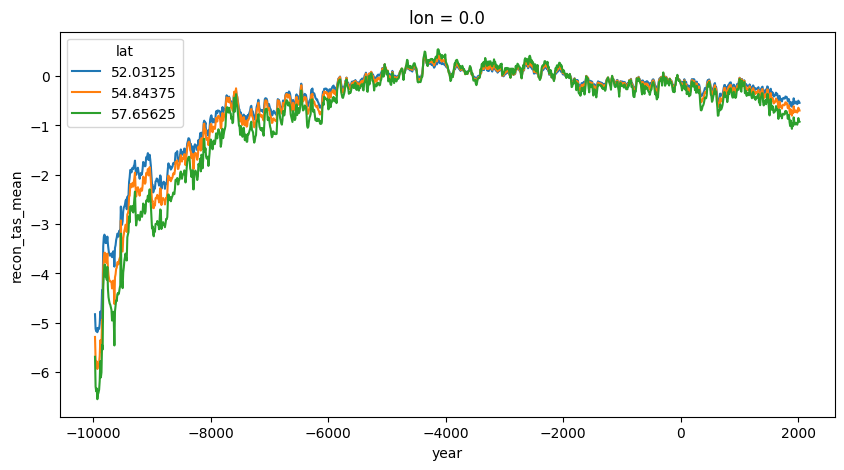

In [7]:
tempmean = temperature['recon_tas_mean']

tempmean.squeeze().plot.line(x='year',
                             hue = 'lat', 
                             figsize=(10, 5))

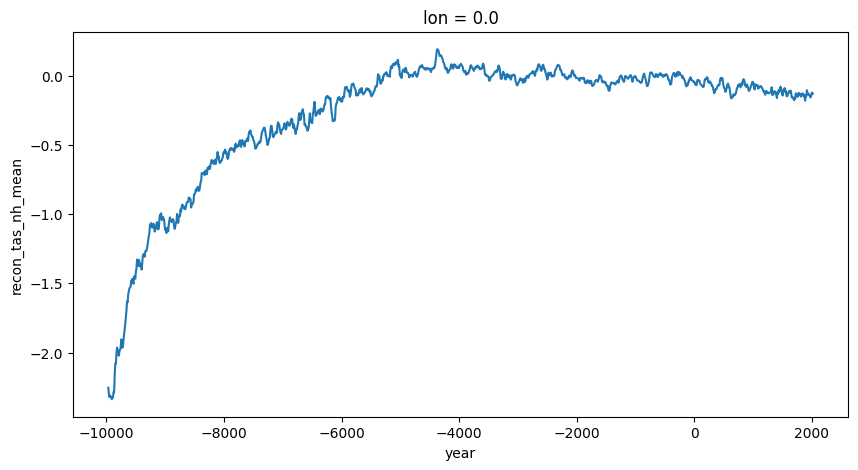

In [8]:
tempmean = temperature['recon_tas_nh_mean'].mean(dim='ens')

tempmean.squeeze().plot.line(x='year',
                             figsize=(10, 5))

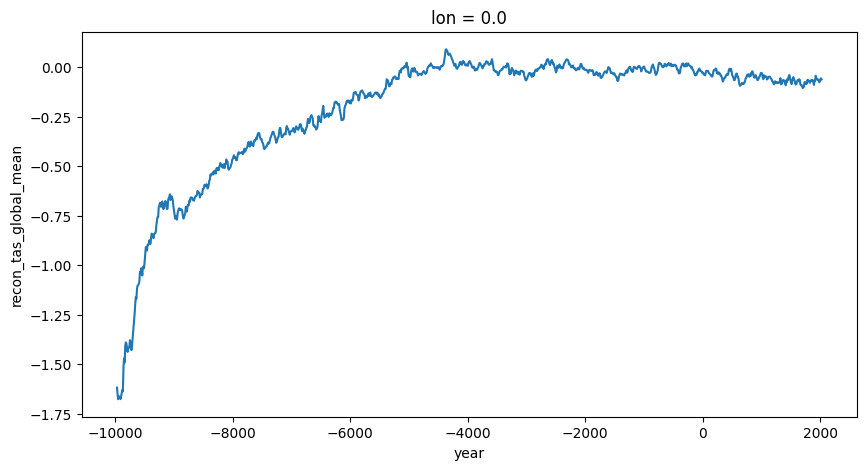

In [9]:
tempmean = temperature['recon_tas_global_mean'].mean(dim='ens')

tempmean.squeeze().plot.line(x='year',
                             figsize=(10, 5))

## Precipitation
Uses Otto-Bliesner, B., and Rosenbloom, N.: Simulation of the Transient Climate of the Last 21,000 Years (TraCE-21ka), Research Data Archive at the National Center for Atmospheric Research, Computational and Information Systems Laboratory, https://doi.org/10.5065/CXB5-TV56, 2021. Accessed† 22 Aug 2025.

In [79]:
PrecipUK = dsPrecip.sel(lon=0, 
                     lat=54.84,  #54.84, 
                     method='nearest')

# Add a new coordinate 'year' multiplying 'time' by 100
PrecipUK = PrecipUK.assign_coords(year=((PrecipUK.time * 1000)+2025).astype(int))

PrecipUK

<xarray.Dataset> Size: 143kB
Dimensions:       (time: 2204, ilev: 27, lev: 26, isccp_prs: 7,
                   isccp_prstau: 49, isccp_tau: 7)
Coordinates:
  * ilev          (ilev) float64 216B 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * isccp_prs     (isccp_prs) float64 56B 90.0 245.0 375.0 ... 620.0 740.0 900.0
  * isccp_prstau  (isccp_prstau) float64 392B 90.0 90.0 90.0 ... 900.0 900.2
  * isccp_tau     (isccp_tau) float64 56B 0.15 0.8 2.45 6.5 16.2 41.5 219.5
    lat           float64 8B 53.81
  * lev           (lev) float64 208B 3.545 7.389 13.97 ... 929.6 970.6 992.6
    lon           float64 8B 0.0
  * time          (time) float64 18kB -22.0 -21.99 -21.98 ... 0.01 0.02 0.03
    year          (time) int64 18kB -19975 -19964 -19954 ... 2035 2045 2054
Data variables: (12/25)
    P0            float64 8B ...
    PRECL         (time) float32 9kB ...
    co2vmr        (time) float64 18kB ...
    date          (time) int32 9kB ...
    date_written  (time) |S8 18kB ...
    datesec       (time) int32 9kB ...
    ...            ...
    nsteph        (time) int32 9kB ...
    ntrk          int32 4B ...
    ntrm          int32 4B ...
    ntrn          int32 4B ...
    time_written  (time) |S8 18kB ...
    wnummax       int32 4B ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 00:02:08 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

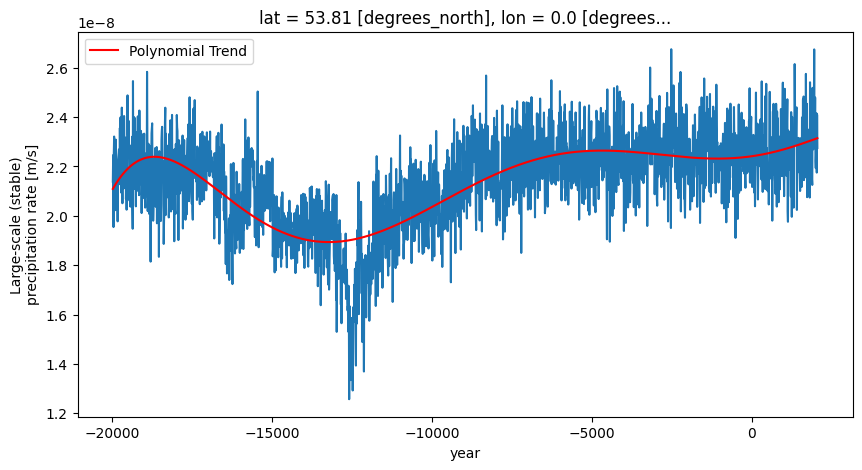

In [80]:
import numpy as np

precipUKdat = PrecipUK['PRECL']

precipUKdat.squeeze().plot.line(x='year',   
                             figsize=(10, 5))


# Fit polynomial to the data
coeffs = np.polyfit(precipUKdat['year'], precipUKdat.values, deg=6)
poly_trend = np.polyval(coeffs, precipUKdat['year'])

import matplotlib.pyplot as plt

plt.plot(precipUKdat['year'], poly_trend, color='red', label='Polynomial Trend')
plt.legend()
plt.show()

In [81]:
precipUKdat 

<xarray.DataArray 'PRECL' (time: 2204)> Size: 9kB
array([2.138079e-08, 2.245922e-08, 1.954418e-08, ..., 2.174971e-08,
       2.409468e-08, 2.274608e-08], shape=(2204,), dtype=float32)
Coordinates:
    lat      float64 8B 53.81
    lon      float64 8B 0.0
  * time     (time) float64 18kB -22.0 -21.99 -21.98 -21.97 ... 0.01 0.02 0.03
    year     (time) int64 18kB -19975 -19964 -19954 -19944 ... 2035 2045 2054
Attributes:
    units:        m/s
    long_name:    Large-scale (stable) precipitation rate
    cell_method:  time: mean

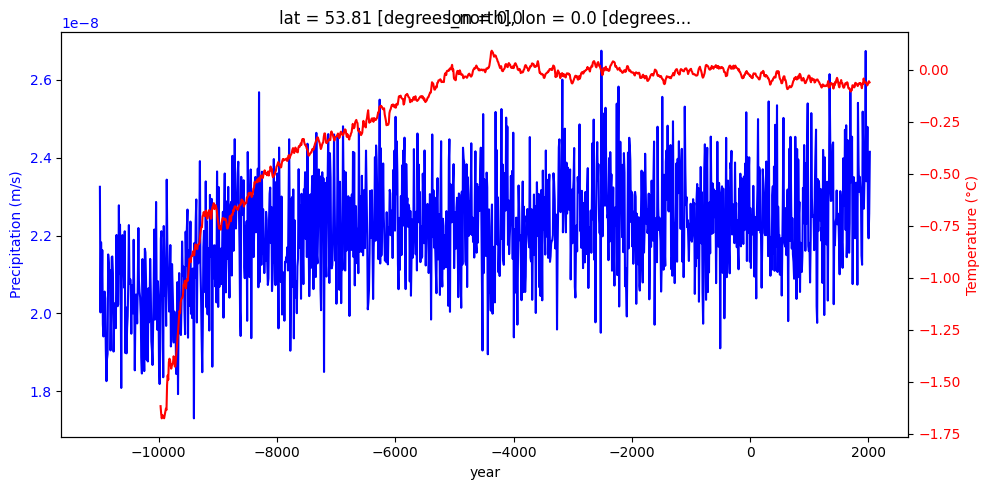

In [82]:
precipUKdat = PrecipUK['PRECL']
#selyears = precipUKdat['year'].where((precipUKdat['year'] > -11000) & (precipUKdat['year'] < 2026), 
#                                     drop=True).values.astype(int)

selyears = (precipUKdat['year'] > -11000) & (precipUKdat['year'] < 2026)

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot precipitation on primary y-axis
precipUKdat[selyears].squeeze().plot.line(x='year', ax=ax1, color='b', label='Precipitation')
ax1.set_ylabel('Precipitation (m/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis for temperature
ax2 = ax1.twinx()
tempmean.plot.line(x='year', ax=ax2, color='r', label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.show()